# Samuel Blais-Dowdy
# Jeremy Trudel
# Remi Langevin

To help us understand ntm, we looked at and were inspired by https://github.com/loudinthecloud/pytorch-ntm

In [74]:
from modules.ntm import *
from modules.lstm import LSTM
import numpy as np
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [75]:
def plot_me(yvalues,title,xerces,yaxis,xvalues=None):
    if xvalues is None:
        xs = [i for i in range(len(yvalues))]
    else:
        xs = xvalues
    plt.figure()
    h1, = plt.plot(xs,yvalues,"r")
    plt.legend(handles=[h1])
    plt.xlabel(xerces)
    plt.ylabel(yaxis)
    plt.title(title)
    plt.show()

# Copy Task

In [109]:
def dataloader(n_batches, bs, seq_width, min_len, max_len):
    for b in range(n_batches):
        # determine seq length for this mini-batch
        seq_len = np.random.randint(min_len, max_len)
        # generate sequence
        seq = np.random.binomial(1, 0.5, (seq_len, bs, seq_width))
        # to torch Variable
        seq = Variable(torch.from_numpy(seq))
        # generate input to be
        inp = Variable(torch.zeros(seq_len + 1, bs, seq_width + 1))
        # fill in with seq
        inp[:seq_len, :, :seq_width] = seq
        # last line has 1 for end
        inp[seq_len, :, seq_width] = 1
        # outp is label
        outp = seq.clone()
        yield inp.float(), outp.float()

In [73]:
def what_is_n_in_n_params(model):
    n = 0
    for p in model.parameters():
        n += p.data.view(-1).size(0)
    return n

## LSTM 

In [82]:
def train_lstm(model, epochs, trainloader,optim,criterion):
    train_losses = []
    for epoch in range(epochs):
        running_loss = 0
        i = 0
        for seq,exp in trainloader:
            model.zero_grad()
            model.hidden = model.create_new_state(seq.shape[1])
            out,hiddens = model(seq,model.hidden)
            if i == len(trainloader)-1 and 1==0:
                print("------------------seq---------------")
                print(seq)
                print("------------------out---------------")
                print(F.sigmoid(model.dense(out[:-1])))
                print("------------------exp---------------")
                print(exp)
            loss = criterion(F.sigmoid(model.dense(out[:-1])),exp)
            loss.backward()
            optim.step()
            running_loss += loss.data[0]
            i += 1
        mean_loss = running_loss/len(trainloader)
        print(mean_loss)
        train_losses.append(mean_loss)
    return train_losses

### Number of params

In [76]:
what_is_n_in_n_params(black_hole)

45208

### Training and HP-search

0.6945304295420647
0.6911873819231987
0.6878339325189591
0.6844456791877747
0.6811643968224526
0.6776138396859169
0.673759689629078
0.6696178699135781
0.6650169964432716
0.6599690706729889
0.6545863273143768
0.6483222568631172
0.641510260283947
0.6336553707122803
0.6250035027265549
0.6155045686364173
0.6044944244623184
0.5921515529751777
0.5787634754180908
0.5637609593272209


/home/prenux/.local/lib/python3.6/site-packages/matplotlib/legend.py:590: UserWarning: The handle <matplotlib.lines.Line2D object at 0x608b58667518> has a label of '_line0' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


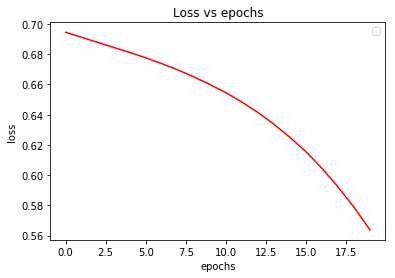

In [79]:
n_inputs = 9
n_outputs = 8
sz_controller = 100

epochs = 20
criterion = nn.BCELoss()
lr = 0.01
bs = 20
n_batches = 1000

trainloader = list(dataloader(n_batches,bs,8,1,20))

#Merci d'avoir voyagé avec la LSTM
black_hole = LSTM(n_inputs,sz_controller,n_outputs)

optim = torch.optim.SGD(black_hole.parameters(),lr=lr)

losses = train_lstm(black_hole,epochs,trainloader,optim,criterion)
plot_me(losses,"Loss vs epochs","epochs",'loss')

0.6861629312038422
0.6675117726325989
0.6384393203258515
0.5872343999743461
0.5023523770868779
0.38576163724064827
0.264201938778162
0.17173958981782197
0.11553008771687746
0.08296234133094549
0.0626730025820434
0.04939445687457919
0.04012793130800128
0.0334016681201756
0.028269255366176367
0.024653845049440862
0.021529930278658866
0.01902467171661556
0.01713985483441502
0.015446302474476398


/home/prenux/.local/lib/python3.6/site-packages/matplotlib/legend.py:590: UserWarning: The handle <matplotlib.lines.Line2D object at 0x608b58ed33c8> has a label of '_line0' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


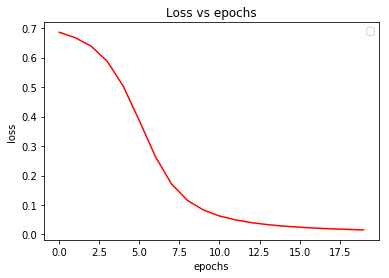

In [80]:
n_inputs = 9
n_outputs = 8
sz_controller = 100

epochs = 20
criterion = nn.BCELoss()
lr = 0.05
bs = 40
n_batches = 1000

trainloader = list(dataloader(n_batches,bs,8,1,20))

#Merci d'avoir voyagé avec la LSTM
black_hole = LSTM(n_inputs,sz_controller,n_outputs)

optim = torch.optim.SGD(black_hole.parameters(),lr=lr)

losses = train_lstm(black_hole,epochs,trainloader,optim,criterion)
plot_me(losses,"Loss vs epochs","epochs",'loss')

0.6754925036430359
0.6069083928465843
0.43230975380539893
0.20790147732943295
0.09483084504306316
0.05429374183155596
0.03616385208256543
0.0261029648296535
0.020214006506837905
0.016210067766718565
0.013411357797682285
0.011399234106298535
0.009908184178173542
0.008620177365839482
0.007681687969947234
0.006904552145861089
0.00626843816274777
0.0056999066367279735
0.005234890352701769
0.004870756397489458


/home/prenux/.local/lib/python3.6/site-packages/matplotlib/legend.py:590: UserWarning: The handle <matplotlib.lines.Line2D object at 0x608b50046ba8> has a label of '_line0' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


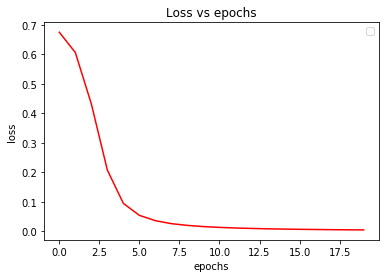

In [81]:
n_inputs = 9
n_outputs = 8
sz_controller = 100

epochs = 20
criterion = nn.BCELoss()
lr = 0.1
bs = 40
n_batches = 1000

trainloader = list(dataloader(n_batches,bs,8,1,20))

#Merci d'avoir voyagé avec la LSTM
black_hole = LSTM(n_inputs,sz_controller,n_outputs)

optim = torch.optim.SGD(black_hole.parameters(),lr=lr)

losses = train_lstm(black_hole,epochs,trainloader,optim,criterion)
plot_me(losses,"Loss vs epochs","epochs",'loss')

### Generalization to larger sequence

In [86]:
def gen_test(model,test_lengths):
    losses = []
    for i in test_lengths:
        running_loss = 0
        testloader = list(dataloader(20,1,8,i,i+1))
        for seq,exp in testloader:
            model.hidden = model.create_new_state(seq.shape[1])
            out,hiddens = model(seq,model.hidden)
            loss = criterion(F.sigmoid(model.dense(out[:-1])),exp)
            running_loss += loss.data[0]
        losses.append(running_loss/len(testloader))
    return losses

/home/prenux/.local/lib/python3.6/site-packages/matplotlib/legend.py:590: UserWarning: The handle <matplotlib.lines.Line2D object at 0x608b4bf2e940> has a label of '_line0' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


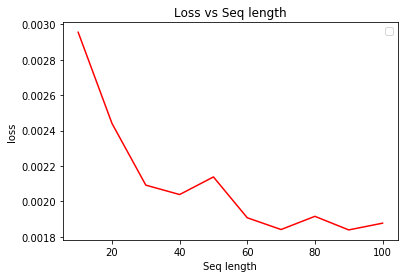

In [110]:
lengths = [i for i in range(10,110,10)]
losses = gen_test(black_hole,lengths)
plot_me(losses,"Loss vs Seq length","Seq length",'loss',lengths)

### Analysis

Thus we didn't do a deep hyperparameter search, the loss seems good on training set, we should validate the loss with a validation set to prevent overfitting.

Mystifyingly enough, the loss seems to decrease while the sequence length increase.

# *-NTM

Too much work on our hands. There is no more time to debug the NTM module. You might want to check what have been done.